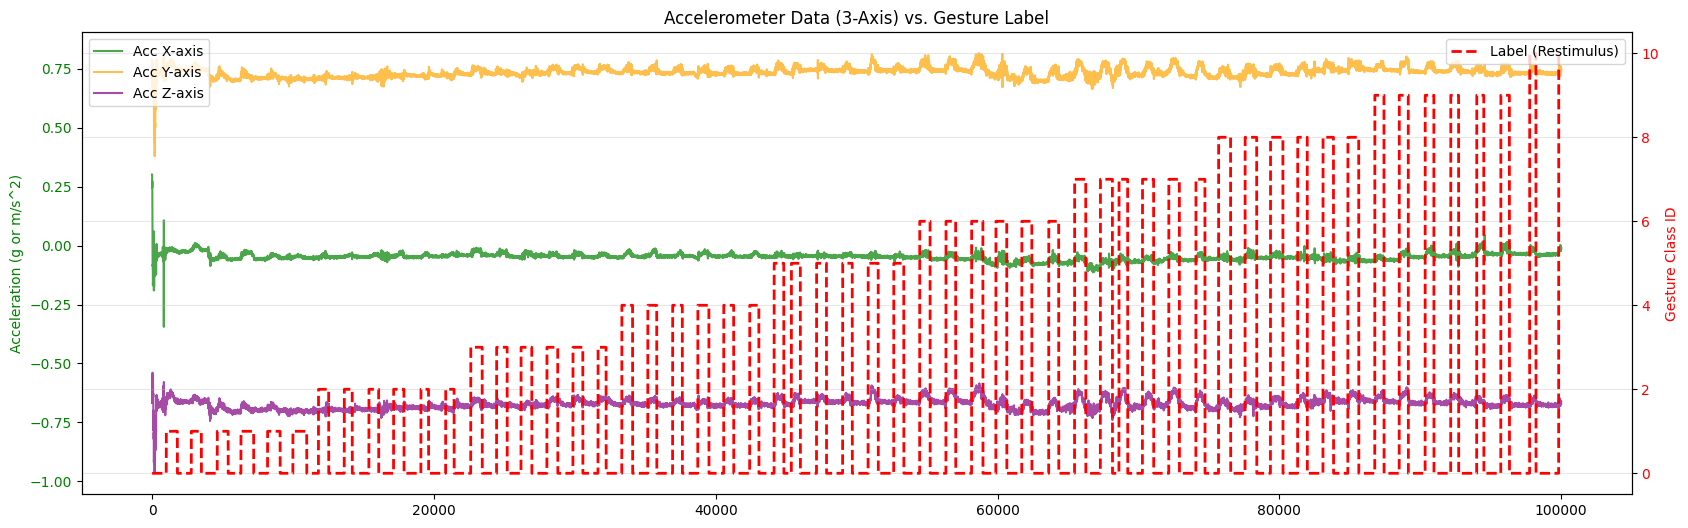

In [10]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# 1. Load data
file_path = 's1/S1_E1_A1.mat' # Ensure the file path is correct
data = scipy.io.loadmat(file_path)

# Load Acceleration data instead of EMG
# Shape is typically (N, 3) for X, Y, Z axes
acc = data['acc'] 
label = data['restimulus']

# 2. Set the visualization time range
# Using the same range to compare with the EMG plot
start = 0
end = 100000

# 3. Plotting
fig, ax1 = plt.subplots(figsize=(20, 6))

# Plot Acceleration signals (3 axes: X, Y, Z)
time_axis = np.arange(start, end)
ax1.plot(time_axis, acc[start:end, 0], label='Acc X-axis', color='green', alpha=0.7)
ax1.plot(time_axis, acc[start:end, 1], label='Acc Y-axis', color='orange', alpha=0.7)
ax1.plot(time_axis, acc[start:end, 2], label='Acc Z-axis', color='purple', alpha=0.7)

ax1.set_ylabel('Acceleration (g or m/s^2)', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.legend(loc='upper left')

# Create a twin axis to plot the labels
ax2 = ax1.twinx()
ax2.plot(time_axis, label[start:end], color='red', linewidth=2, linestyle='--', label='Label (Restimulus)')
ax2.set_ylabel('Gesture Class ID', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.title('Accelerometer Data (3-Axis) vs. Gesture Label')
plt.grid(True, alpha=0.3) # Adding grid for easier reading
plt.savefig("Accelerometer_Data_vs_Gesture_Label.pdf")
plt.show()

(130267, 16)


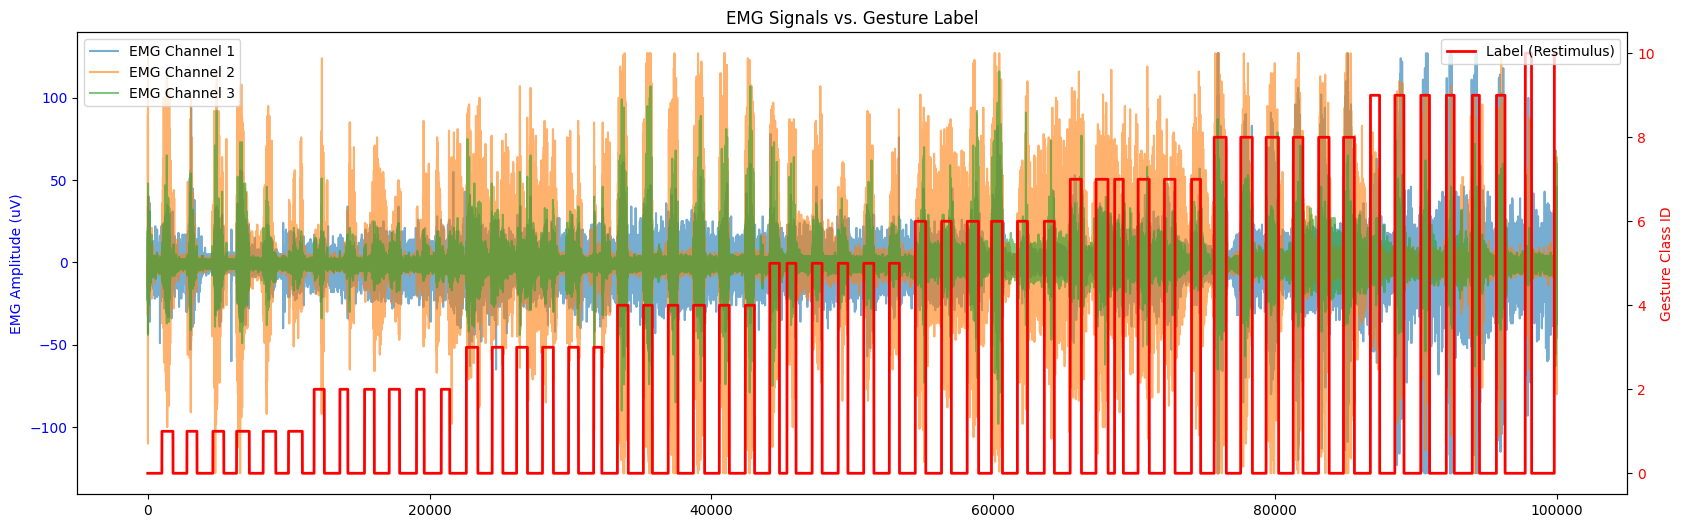

In [11]:
# 1. Load data
file_path = 's1/S1_E1_A1.mat' # Ensure the file path is correct
data = scipy.io.loadmat(file_path)

emg = data['emg']
label = data['restimulus']
print(emg.shape)

# 2. Set the visualization time range
# This interval usually contains movements, not just rest periods
start = 0
end = 100000

# 3. Plotting
fig, ax1 = plt.subplots(figsize=(20, 6))

# Plot EMG signals (plotting only the first few channels as an example to avoid clutter)
time_axis = np.arange(start, end)
ax1.plot(time_axis, emg[start:end, 0], label='EMG Channel 1', alpha=0.6)
ax1.plot(time_axis, emg[start:end, 1], label='EMG Channel 2', alpha=0.6)
ax1.plot(time_axis, emg[start:end, 2], label='EMG Channel 3', alpha=0.6)
ax1.set_ylabel('EMG Amplitude (uV)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a twin axis to plot the labels
ax2 = ax1.twinx()
ax2.plot(time_axis, label[start:end], color='red', linewidth=2, label='Label (Restimulus)')
ax2.set_ylabel('Gesture Class ID', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.title('EMG Signals vs. Gesture Label')
plt.savefig("graph/EMG_Signals_vs_Gesture_Label.pdf")
plt.show()

DEBUG: Rect Y=-153.5, Height=306.0


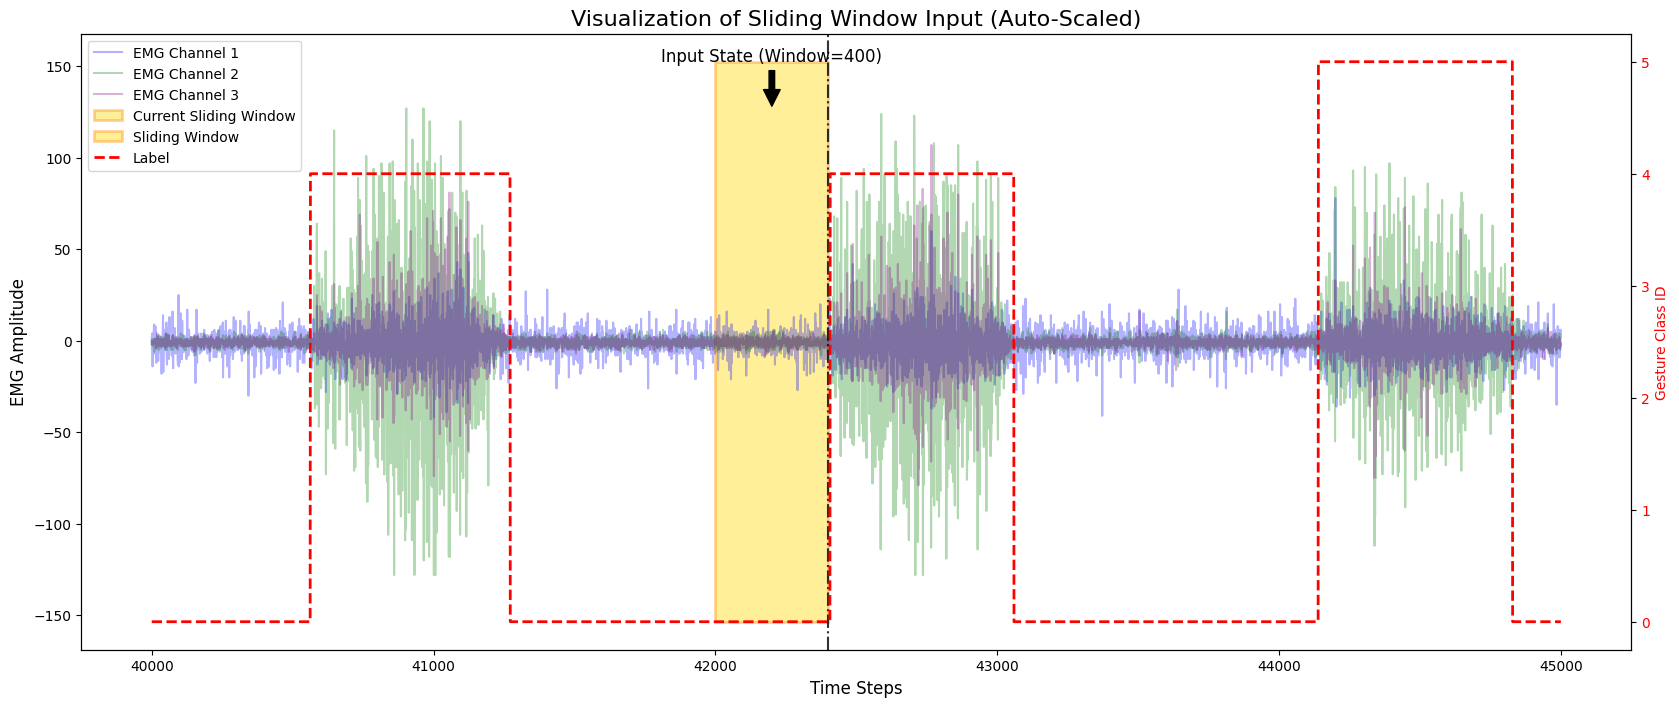

In [12]:
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# 1. Load data
file_path = 's1/S1_E1_A1.mat' 
data = scipy.io.loadmat(file_path)

emg = data['emg']
label = data['restimulus']

# 2. Settings
start = 40000
end = 45000
time_axis = np.arange(start, end)
WINDOW_SIZE = 400 
CURRENT_IDX = 42000 

# 3. Plotting
fig, ax1 = plt.subplots(figsize=(20, 8))

# --- Plot EMG Signals ---
# Plot first 3 channels
ax1.plot(time_axis, emg[start:end, 0], color='blue', alpha=0.3, label='EMG Channel 1')
ax1.plot(time_axis, emg[start:end, 1], color='green', alpha=0.3, label='EMG Channel 2')
ax1.plot(time_axis, emg[start:end, 2], color='purple', alpha=0.3, label='EMG Channel 3')

ax1.set_ylabel('EMG Amplitude', color='black', fontsize=12)
ax1.set_xlabel('Time Steps', fontsize=12)

# --- KEY FIX: Auto-calculate Rectangle Height ---
# Calculate the min and max of the visible data to set rectangle size dynamically
visible_data = emg[start:end, 0:3] # Check the channels we are plotting
y_min = np.min(visible_data)
y_max = np.max(visible_data)
y_range = y_max - y_min

# Add a little padding (10%) so the box covers the signal comfortably
rect_y = y_min - (y_range * 0.1)
rect_height = y_range * 1.2

print(f"DEBUG: Rect Y={rect_y}, Height={rect_height}") # Verify values in console

# --- Draw the Sliding Window ---
rect = patches.Rectangle(
    (CURRENT_IDX, rect_y),      # Dynamic Y start
    WINDOW_SIZE,                # Width
    rect_height,                # Dynamic Height
    linewidth=2,
    edgecolor='#FF8C00',
    facecolor='#FFD700',
    alpha=0.4,
    label='Current Sliding Window'
)
ax1.add_patch(rect)

# --- Plot Labels (Ground Truth) ---
ax2 = ax1.twinx()
ax2.plot(time_axis, label[start:end], color='red', linewidth=2, linestyle='--', label='Label')
ax2.set_ylabel('Gesture Class ID', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# --- Annotations ---
ax1.annotate(
    f'Input State (Window={WINDOW_SIZE})', 
    xy=(CURRENT_IDX + WINDOW_SIZE/2, y_max),  
    xytext=(CURRENT_IDX + WINDOW_SIZE/2, y_max + y_range*0.1), 
    arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize=12,
    ha='center'
)

# Vertical line for "Time t"
ax1.axvline(x=CURRENT_IDX + WINDOW_SIZE, color='black', linestyle='-.', alpha=0.8)

# Legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines_1.append(rect)
labels_1.append('Sliding Window')
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title(f'Visualization of Sliding Window Input (Auto-Scaled)', fontsize=16)
plt.savefig("Sliding_Window_Fixed.pdf")
plt.show()